<a href="https://colab.research.google.com/github/YueSelene/Main-Project-ASIET/blob/main/Disease_Alert_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.0467 - loss: 3.1170 - val_accuracy: 0.0429 - val_loss: 3.0844
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0713 - loss: 3.0643 - val_accuracy: 0.0552 - val_loss: 3.0708
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0905 - loss: 3.0370 - val_accuracy: 0.0798 - val_loss: 3.0512
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1376 - loss: 2.9698 - val_accuracy: 0.1288 - val_loss: 3.0026
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1549 - loss: 2.8768 - val_accuracy: 0.1595 - val_loss: 2.9171
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2250 - loss: 2.7648 - val_accuracy: 0.2025 - val_loss: 2.7771
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2268 - loss: 2.6194 - val_accuracy: 0.2945 - val_loss: 2.5553
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3099 - loss: 2.3726 - val_accuracy: 0.4049 - val_loss: 2.2297
Ep

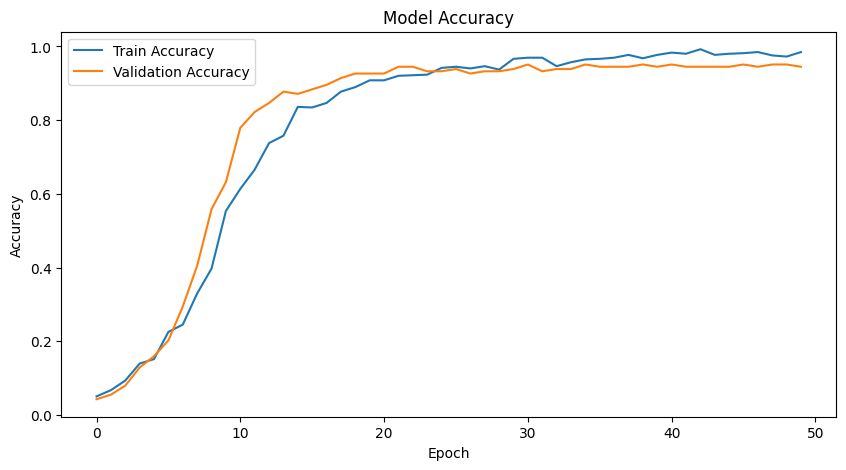

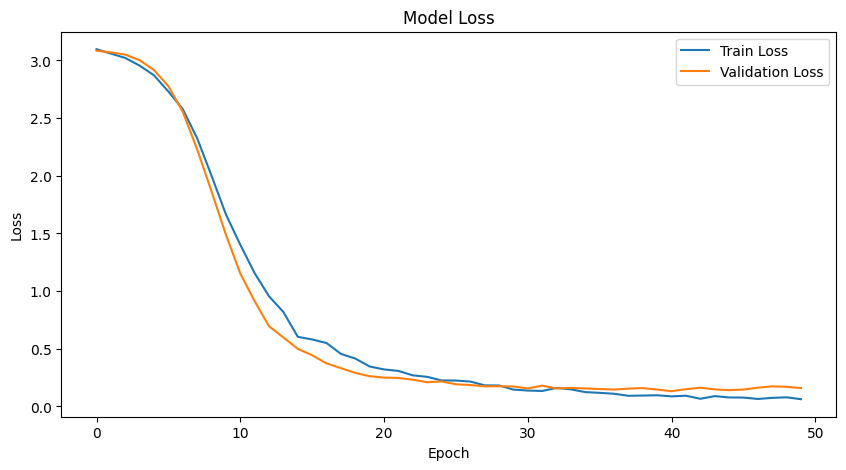

In [1]:
# Preprocessing the dataset for deep learning model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
data = pd.read_csv("disease.csv")  # Replace with your actual file

# Drop the ID column as it's not relevant for the model
data = data.drop(columns=["ID"])

# Handle missing values (if any)
data = data.dropna()

# Splitting features (X) and target (y)
X = data.drop(columns=["Predicted Disease"])
y = data["Predicted Disease"]

# One-hot encoding categorical features (Location, Gender, Smoking, Alcohol, Chronic Condition, Season, Symptoms)
categorical_features = ['Location', 'Gender', 'Smoking', 'Alcohol', 'Chronic Condition',
                        'Pollen Allergy', 'Season', 'Symptom 1', 'Symptom 2', 'Symptom 3']

# Use get_dummies for one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_features)

# Normalize continuous features (Age, BMI, AQI, Temp (°C), Humidity (%))
from sklearn.preprocessing import StandardScaler

continuous_features = ['Age', 'BMI', 'AQI', 'Temp (°C)', 'Humidity (%)']
scaler = StandardScaler()

X_encoded[continuous_features] = scaler.fit_transform(X_encoded[continuous_features])

# One-hot encode the target (y) if it's a multi-class classification
y_encoded = pd.get_dummies(y)

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Checking the shapes of the processed data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Define the deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

# Input layer and first hidden layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))

# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Third hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (softmax for multi-class classification)
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

# Plot Accuracy graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot Loss graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [2]:
import requests

# Function to fetch weather and AQI data based on location input
def get_location_data(location):
    # Example API call to OpenWeatherMap (or similar service) for fetching AQI, Humidity, Temperature
    # Replace 'your_api_key' with your actual API key from the weather or AQI provider
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={location}&appid=33097de9e6f4716a711d7a38fb8fcbf6"

    response = requests.get(weather_url)
    if response.status_code == 200:
        data = response.json()
        # Extract relevant information
        aqi = data.get('main', {}).get('aqi', 0)  # Air Quality Index
        temp = data.get('main', {}).get('temp', 0)  # Temperature (Kelvin, convert to Celsius)
        humidity = data.get('main', {}).get('humidity', 0)  # Humidity (%)

        temp_celsius = temp - 273.15  # Convert temperature from Kelvin to Celsius
        return aqi, temp_celsius, humidity
    else:
        print("Error fetching data from the API.")
        return None, None, None

# Get user inputs for dynamic input features
def get_user_inputs():
    location = input("Enter your location: ")

    # Fetch AQI, temperature, and humidity from API based on location
    aqi, temp, humidity = get_location_data(location)

    age = float(input("Enter your age: "))

    # Get height and weight from user and calculate BMI
    height = float(input("Enter your height (in meters): "))
    weight = float(input("Enter your weight (in kilograms): "))
    bmi = weight / (height ** 2)

    smoking = input("Are you a smoker? (Yes/No): ")
    alcohol = input("Do you consume alcohol? (Yes/Occasional/None): ")
    chronic_condition = input("Any chronic conditions? (Asthma/Hypertension/None): ")
    pollen_allergy = input("Do you have a pollen allergy? (Y/N): ")
    season = input("Enter the current season (Summer/Winter/etc.): ")
    symptom_1 = input("Enter Symptom 1: ")
    symptom_2 = input("Enter Symptom 2: ")
    symptom_3 = input("Enter Symptom 3: ")

    return {
        'location': location,
        'age': age,
        'bmi': bmi,
        'aqi': aqi,
        'temp': temp,
        'humidity': humidity,
        'smoking': smoking,
        'alcohol': alcohol,
        'chronic_condition': chronic_condition,
        'pollen_allergy': pollen_allergy,
        'season': season,
        'symptom_1': symptom_1,
        'symptom_2': symptom_2,
        'symptom_3': symptom_3
    }

# Update the preprocessed data to handle new inputs from user
def process_user_inputs(user_inputs):
    # Convert the user input dictionary into a DataFrame row for prediction
    user_data = pd.DataFrame([user_inputs])

    # One-hot encode categorical features
    categorical_features = ['location', 'smoking', 'alcohol', 'chronic_condition', 'pollen_allergy', 'season', 'symptom_1', 'symptom_2', 'symptom_3']
    user_data_encoded = pd.get_dummies(user_data, columns=categorical_features)

    # Ensure the encoded data has the same columns as training data
    missing_cols = set(X_encoded.columns) - set(user_data_encoded.columns)
    for col in missing_cols:
        user_data_encoded[col] = 0
    user_data_encoded = user_data_encoded[X_encoded.columns]  # Reorder to match the training data

    # Normalize continuous features
    user_data_encoded[continuous_features] = scaler.transform(user_data_encoded[continuous_features])

    return user_data_encoded

# After model training, use the user input for prediction
user_inputs = get_user_inputs()
processed_input = process_user_inputs(user_inputs)

# Predict the disease using the trained model
prediction = model.predict(processed_input)
predicted_disease = y_encoded.columns[np.argmax(prediction)]
print(f"You are likely to have {predicted_disease}")




Enter your location: Thrissur
Enter your age: 10
Enter your height (in meters): 0.9
Enter your weight (in kilograms): 35
Are you a smoker? (Yes/No): no
Do you consume alcohol? (Yes/Occasional/None): none
Any chronic conditions? (Asthma/Hypertension/None): none
Do you have a pollen allergy? (Y/N): n
Enter the current season (Summer/Winter/etc.): summer
Enter Symptom 1: cough
Enter Symptom 2: fever
Enter Symptom 3: sore throat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
You are likely to have Gastroenteritis


<ipython-input-2-081c68510228>:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_data_encoded[col] = 0
<ipython-input-2-081c68510228>:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_data_encoded[col] = 0
<ipython-input-2-081c68510228>:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user

In [3]:
pip install -U google-genai

In [4]:
from google import genai
from google.genai import types

client = genai.Client(
    api_key=GOOGLE_API_KEY,

    http_options={'api_version':'v1alpha'},
)

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:502: UserWarning: <built-in function any> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


NameError: name 'GOOGLE_API_KEY' is not defined